## Prediksi Harga Property
__Linear Regression__

Referensi pembelajaran: 
- https://www.youtube.com/watch?v=N0jbX_yL5iA
- https://medium.com/@adiptamartulandi/memprediksi-harga-rumah-dengan-machine-learning-multivariate-linear-regression-ucupstory-6f0bac830077


Dataset: https://www.kaggle.com/datasets/wisnuanggara/daftar-harga-rumah



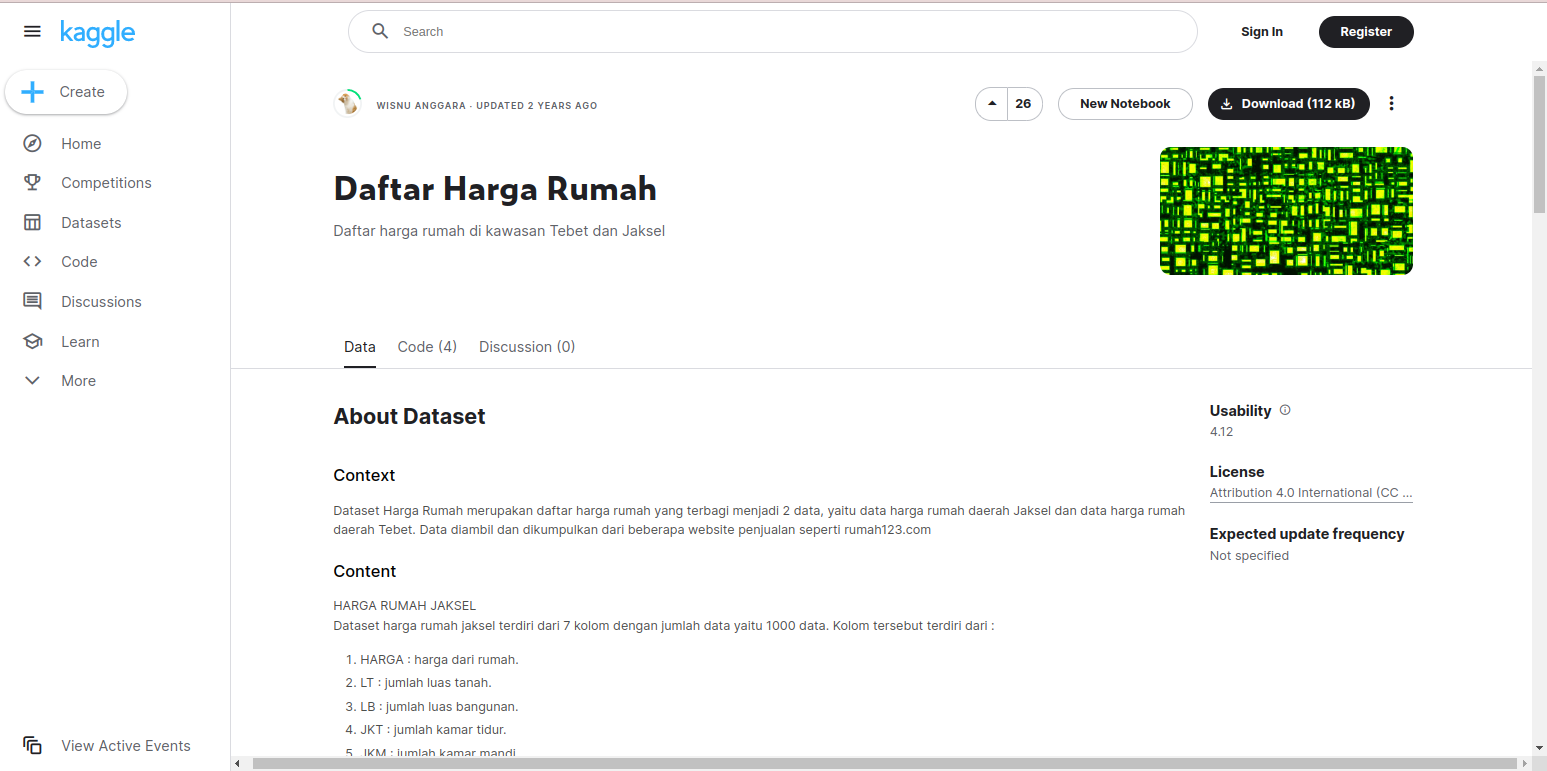

## Persiapan
__Memuat data dari google drive__

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

**Mengimport library yang dibutuhkan**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import linear_model
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math

__Me-load dataset & menyesuaikan kolom yang ada__

Terdapat beberapa atribut yang dapat kita analisis yaitu:
- harga
- luas_bangunan
- luas_tanah
- jumlah_kamar_tidur
- jumlah_kamar_mandi
- kapasitas_mobil_dalam_garasi


In [3]:
# df = pd.read_csv('./drive/MyDrive/Colab Notebooks/HargaRumah/data_rumah.csv')
df = pd.read_csv('./data_rumah.csv')
df.head()

,no,nama_rumah,harga,luas_bangunan,luas_tanah,jumlah_kamar_tidur,jumlah_kamar_mandi,kapasitas_mobil_dalam_garasi
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


---

## Melakukan Analisis Dataset

__Melakukan check apakah ada data yang kosong__

> Dari dataset tidak ditemukan data yang kosong

In [4]:
df.isnull().sum()

no                              0
nama_rumah                      0
harga                           0
luas_bangunan                   0
luas_tanah                      0
jumlah_kamar_tidur              0
jumlah_kamar_mandi              0
kapasitas_mobil_dalam_garasi    0
dtype: int64

__Analisis Attribut Luas Bangunan__

> Diketahui bahwa populasi data mayoritas memiliki `luas_bangunan` berada pada kisaran __100 s/d 500__ dengan median berada pada angka 200
>
> Kemudian kita lihat dari diagram __box plot__, banyak terjadi __data extreme__ di angka __700__ ke atas
>
> Dari diagram __scatter plot__ juga kita bisa melihat bahwa terjadi kejanggalan pada data yang memiliki `luas_bangunan` __300 s/d 400__ namun memiliki harga diatas __50 milyar__

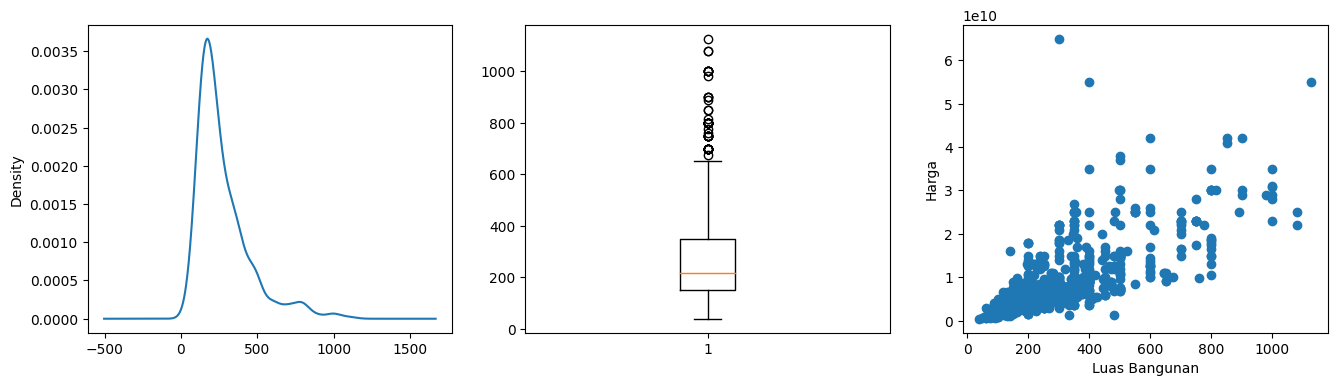

In [5]:
f = plt.figure(figsize=(16,4))
f.add_subplot(1,3,1)
#sns.countplot(x=df['luas_bangunan'])
df['luas_bangunan'].plot(kind="kde")

f.add_subplot(1,3,2)
plt.boxplot(df['luas_bangunan'])

f.add_subplot(1,3,3)
plt.scatter( df['luas_bangunan'], df['harga'])
plt.ylabel("Harga")
plt.xlabel("Luas Bangunan")

plt.show()

__Analisis Attribut Luas Tanah__

> Hampir sama seperti atribut `luas_bangunan` populasi data mayoritas memiliki `luas_tanah` berada pada kisaran __100 s/d 500__ dengan median berada pada angka 200
>
> Kemudian kita lihat dari diagram __box plot__, banyak __data extreme__ di angka __600__ ke atas
>
> Dari diagram __scatter plot__ juga kita bisa melihat bahwa terjadi kejanggalan pada data yang memiliki `luas_tanah` dengan kisaran __250__ namun memiliki harga diatas __60 milyar__

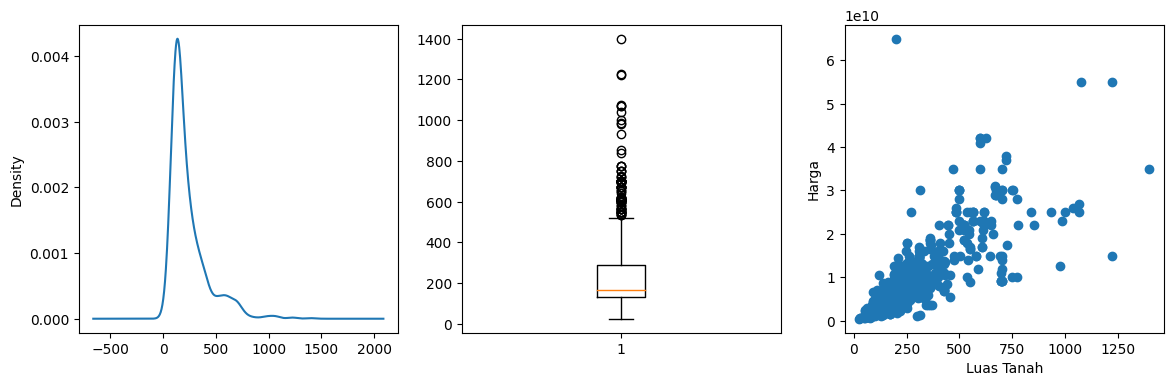

In [6]:
f = plt.figure(figsize=(14,4))
f.add_subplot(1,3,1)
df['luas_tanah'].plot(kind='kde')

f.add_subplot(1,3,2)
plt.boxplot(df['luas_tanah'])

f.add_subplot(1,3,3)
plt.scatter(df['luas_tanah'], df['harga'])
plt.ylabel("Harga")
plt.xlabel("Luas Tanah")

plt.show()

__Analisis Attribut Jumlah Kamar Tidur__

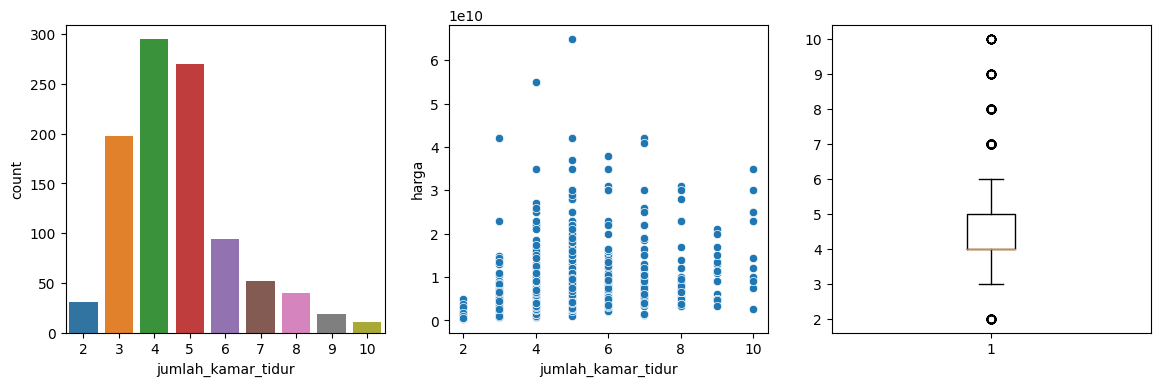

In [7]:
f = plt.figure(figsize=(14,4))
f.add_subplot(1,3,1)
sns.countplot(x=df['jumlah_kamar_tidur'])

f.add_subplot(1,3,2)
# plt.boxplot(df['jumlah_kamar_tidur'])
sns.scatterplot(x=df['jumlah_kamar_tidur'], y=df['harga'])

f.add_subplot(1,3,3)
plt.boxplot(df['jumlah_kamar_tidur'])

plt.show()

__Analisis Attribut Jumlah Kamar Mandi__

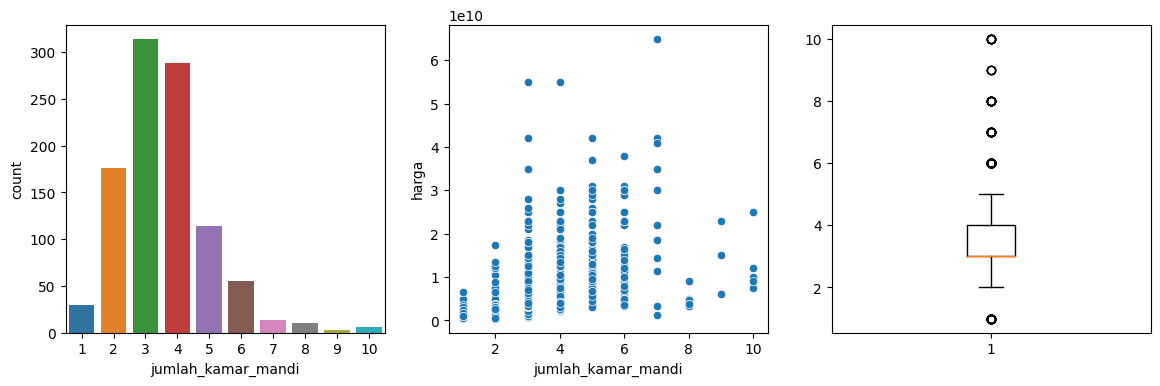

In [8]:
f = plt.figure(figsize=(14,4))
f.add_subplot(1,3,1)
sns.countplot(x=df['jumlah_kamar_mandi'])

f.add_subplot(1,3,2)
sns.scatterplot(x=df['jumlah_kamar_mandi'], y=df['harga'])

f.add_subplot(1,3,3)
plt.boxplot(df['jumlah_kamar_mandi'])

plt.show()

__Analisis Attribut Kapasitas Garasi__

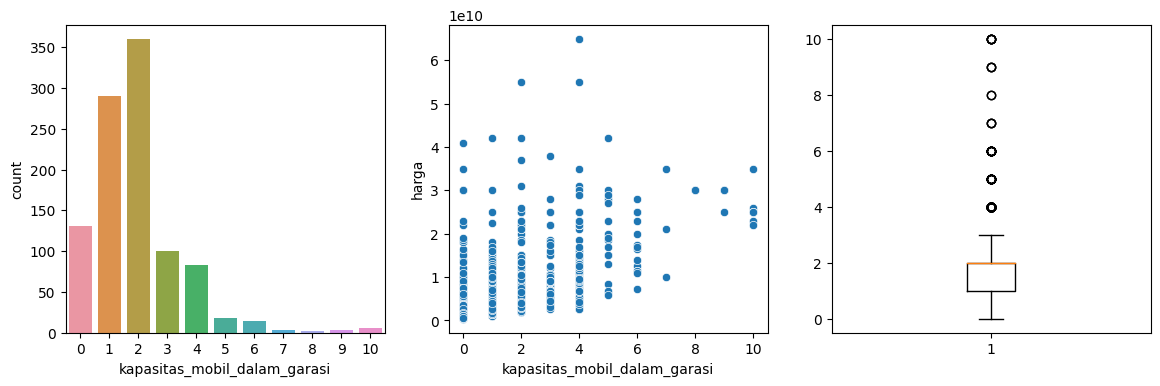

In [9]:
f = plt.figure(figsize=(14,4))
f.add_subplot(1,3,1)
sns.countplot(x=df['kapasitas_mobil_dalam_garasi'])

f.add_subplot(1,3,2)
sns.scatterplot(x=df['kapasitas_mobil_dalam_garasi'], y=df['harga'])

f.add_subplot(1,3,3)
plt.boxplot(df['kapasitas_mobil_dalam_garasi'])

plt.show()

___

## Data Cleansing

Di sini kami akan melakukan pembersihan data dengan kriteria yang telah kita ambil dari tahap analisis, sebagai berikut:
- Mengeliminasi data dengan **harga > 50 milyar** dan **luas_bangunan < 450** (menghilangkan kejanggalan)
- Mengeliminasi data dengan **harga > 50 milyar** dan **luas_tanah < 400** (menghilangkan kejanggalan)
- Mengeliminasi data dengan **jumlah_kamar_tidur > 6** (membatasi nilai ekstrim)
- Mengeliminasi data dengan **jumlah_kamar_mandi > 5** (membatasi nilai ekstrim & menghilangkan kejanggalan)
- Mengeliminasi data dengan **kapasitas_mobil_dalam_garasi > 4 **(membatasi nilai ekstrim)

In [10]:
df_cleansing = df.copy()

# cleaning outlier luas_bangunan
df_cleansing = df_cleansing.loc[~((df_cleansing['harga'] > 50 * 10**9) & (df_cleansing['luas_bangunan'] < 450))]

# cleaning outlier luas_tanah
df_cleansing = df_cleansing.loc[~((df_cleansing['harga'] > 50 * 10**9) & (df_cleansing['luas_tanah'] < 300))]

# cleaning outlier jumlah_kamar_tidur
df_cleansing = df_cleansing.loc[~(df_cleansing['jumlah_kamar_tidur'] > 6)]

# cleaning outlier jumlah_kamar_mandi
df_cleansing = df_cleansing.loc[~(df_cleansing['jumlah_kamar_mandi'] > 5)]

# cleaning outlier kapasitas_mobil_dalam_garasi
df_cleansing = df_cleansing.loc[~(df_cleansing['kapasitas_mobil_dalam_garasi'] > 4)]

df_fix = df_cleansing.copy()

df_fix.count()

no                              831
nama_rumah                      831
harga                           831
luas_bangunan                   831
luas_tanah                      831
jumlah_kamar_tidur              831
jumlah_kamar_mandi              831
kapasitas_mobil_dalam_garasi    831
dtype: int64

## Pengecekan Integritas Data


<Figure size 1000x800 with 0 Axes>

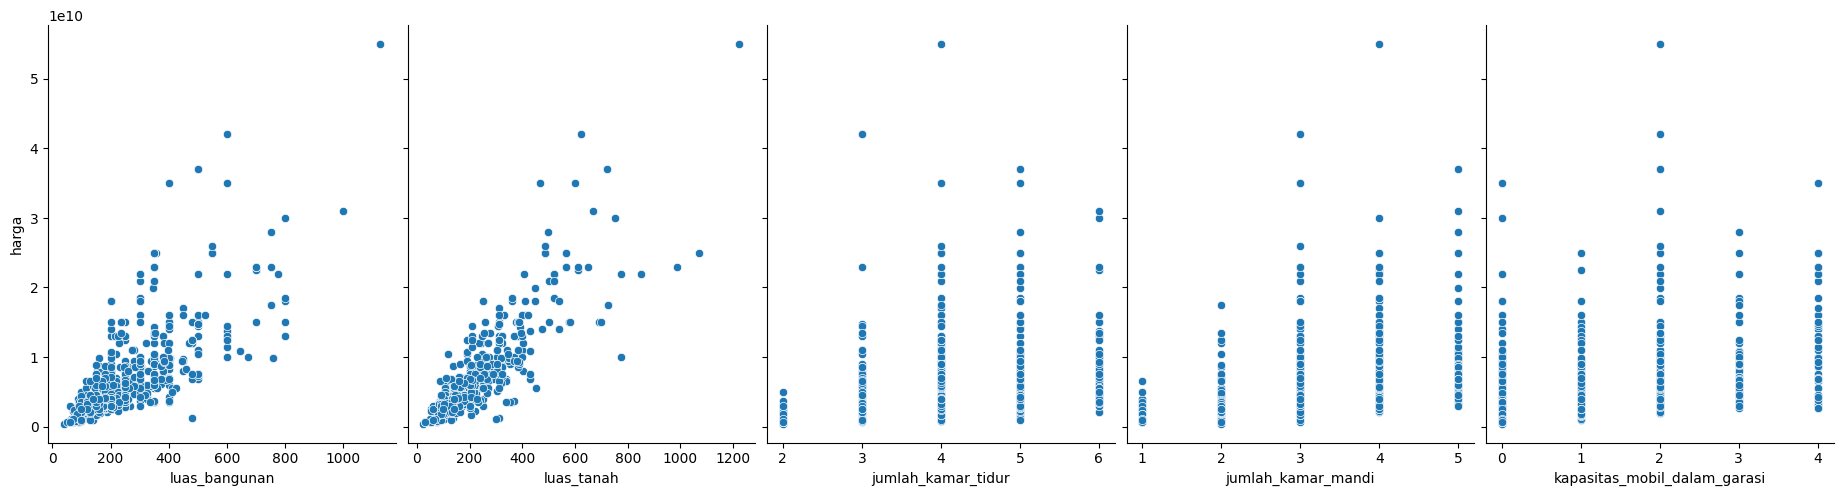

In [11]:

plt.figure(figsize=(10,8))
sns.pairplot(
	data=df_fix,
	x_vars=['luas_bangunan', 'luas_tanah', 'jumlah_kamar_tidur', 'jumlah_kamar_mandi', 'kapasitas_mobil_dalam_garasi'],
	y_vars=['harga'],
	height=5,
	aspect=0.75,
	kind='scatter',
)

In [12]:
# Mengetahui nilai korelasi dari independent variable dan dependent variable. (diketahui luas_tanah & luas_bangunan mempunyai hubungan linear positif yang sangat kuat)
df_fix2 = df_fix[['harga', 'luas_bangunan', 'luas_tanah', 'jumlah_kamar_mandi', 'jumlah_kamar_tidur', 'kapasitas_mobil_dalam_garasi']]
df_fix2.corr().style.format(precision=3).background_gradient()

,harga,luas_bangunan,luas_tanah,jumlah_kamar_mandi,jumlah_kamar_tidur,kapasitas_mobil_dalam_garasi
harga,1.000,0.734,0.862,0.344,0.280,0.347
luas_bangunan,0.734,1.000,0.729,0.467,0.381,0.399
luas_tanah,0.862,0.729,1.000,0.274,0.323,0.318
jumlah_kamar_mandi,0.344,0.467,0.274,1.000,0.537,0.343
jumlah_kamar_tidur,0.280,0.381,0.323,0.537,1.000,0.247
kapasitas_mobil_dalam_garasi,0.347,0.399,0.318,0.343,0.247,1.000


<br>

---

<br>

## Tahap Pemodelan

In [13]:
# membuat variabel x dan y
x = df_fix[['luas_bangunan', 'luas_tanah', 'jumlah_kamar_tidur', 
            'jumlah_kamar_mandi', 'kapasitas_mobil_dalam_garasi']]
y = df_fix[['harga']]

# split data menjadi training dan testing dengan porsi 7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# mebuat object linear regression
lin_reg = LinearRegression()

# train model dengan menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

# mencari tahu nilai koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)


[[ 7.25438723e+06  2.85518444e+07 -3.56267341e+08  5.00876810e+08
   1.48321405e+08]]
[-1.52537229e+09]


In [14]:
# mencari tahu skor akurasi dari model
lin_reg.score(x_test, y_test)


0.8603318020014091

In [15]:
# prediksi harga rumah
result = lin_reg.predict([[50,50,2,1,0]])
print("Hasil Prediksi: Rp {:,}\n\n".format(math.floor(result[0][0])))

Hasil Prediksi: Rp 53,281,424




/home/nabif/Projects/nusamandiri/dwbi_linear_regression/.venv/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
result = lin_reg.predict([[1000,1000,4,3,0]])
print("Hasil Prediksi: Rp {:,}\n\n".format(math.floor(result[0][0])))

Hasil Prediksi: Rp 34,358,420,393




/home/nabif/Projects/nusamandiri/dwbi_linear_regression/.venv/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<br>
<br>

---

# END

---


